In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense, InputLayer

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import yfinance as yf

In [ ]:
data = yf.download('SPY', start='2015-01-01', end='2025-01-01')

C:\Users\yahya\AppData\Local\Temp\ipykernel_20780\1651756056.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('SPY', start='2015-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


In [132]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2015-01-02,170.589539,171.793632,169.551536,171.378431,121465900
2015-01-05,167.508789,169.709351,167.201544,169.543273,169632600
2015-01-06,165.931061,168.339223,165.133869,167.816066,209151400
2015-01-07,167.998749,168.339217,166.811279,167.259691,125346700
2015-01-08,170.979919,171.195832,169.393860,169.410459,147217800


In [133]:
df = data[['Close']].copy()

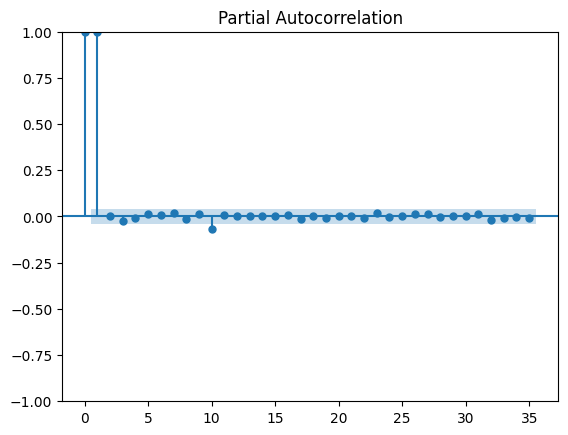

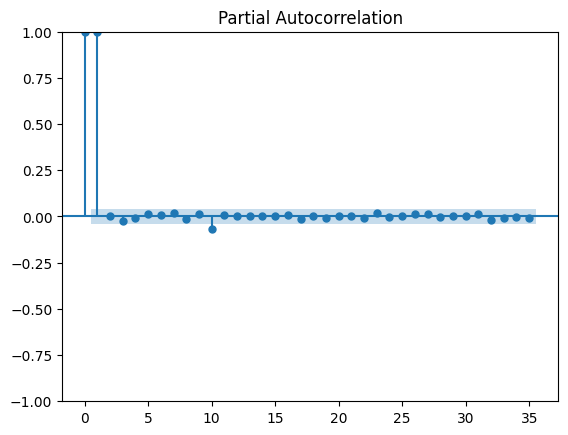

In [297]:
plot_pacf(data['Close'].dropna())

In [233]:
df = df.diff(1)
df.dropna(inplace=True)

In [212]:
df.head()

Price,Close
Ticker,SPY
Date,
2015-01-02,NaN
2015-01-05,-3.080750
2015-01-06,-1.577728
2015-01-07,2.067688
2015-01-08,2.981171


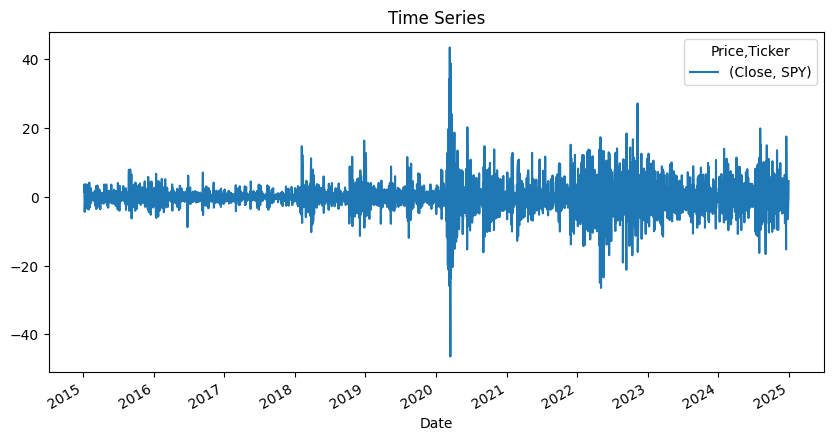

In [236]:
series = df['Close'].values

df.plot(figsize=(10, 5))
plt.title("Time Series")
plt.show()

In [237]:
# split = int(0.8 * len(series))
# X, y = series[:split], series[split:]

In [238]:
scaler = MinMaxScaler(feature_range=(0, 1))
# series_scaled = scaler.fit_transform(series.reshape(-1, 1))

In [239]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

In [240]:
WINDOW_SIZE = 20

X, y = create_sequences(series, WINDOW_SIZE)

print(X.shape)  # (samples, timesteps, features)
print(y.shape)


(2494, 20, 1)
(2494, 1)


In [ ]:
# X_scaled = []
# for i in range(X.shape[0]):
#     X_scaled.append(scaler.fit_transform(X[i].reshape(-1, 1)))

# X_scaled = np.array(X_scaled)

In [ ]:
# y_scaled = scaler.fit_transform(y)

In [258]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [259]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1995, 20, 1), (1995, 1), (499, 20, 1), (499, 1))

In [261]:
model = Sequential(
    [
        InputLayer(input_shape=(WINDOW_SIZE, 1)),
        LSTM(
            100,
            return_sequences=True,
        ),
        LSTM(
            100,
            return_sequences=True,
        ),
        LSTM(
            50,
        ),
        Dense(8, activation="relu"),
        Dense(1, activation="linear"),
    ]
)

model.compile(optimizer="adam", loss="mse")

model.summary()

c:\Users\yahya\Desktop\MR Project\Code\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_36 (LSTM)                  │ (None, 20, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_37 (LSTM)                  │ (None, 20, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_38 (LSTM)                  │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 8)              │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,817 (593.04 KB)

 Trainable params: 151,817 (593.04 KB)

 Non-trainable params: 0 (0.00 B)

In [272]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 10.3379 - val_loss: 50.0024
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 10.3872 - val_loss: 51.2096
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 10.4228 - val_loss: 49.6035
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 10.1792 - val_loss: 51.2583
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 9.7539 - val_loss: 48.9439
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 9.7754 - val_loss: 48.8213
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 9.6032 - val_loss: 47.2450
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 9.2356 - val_loss: 53.7493
Epoch 9/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 8.9189 - val_loss: 52.4139
Epoch 10/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 8.8218 - val_loss: 52.1185
Epoch 11/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 9.1466 - val_loss: 51.7131
Epoch 12/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/s

In [273]:
y_pred_scaled = model.predict(X_test)

# Inverse scaling
# y_pred = scaler.inverse_transform(y_pred_scaled)
# y_true = scaler.inverse_transform(y_test)
y_pred = y_pred_scaled
y_true = y_test

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


In [274]:
prd = pd.DataFrame(y_pred, index=df[-y_pred.shape[0]:].index, columns=['Predicted'])

In [275]:
prd

,Predicted
Date,
2023-01-06,5.036901
2023-01-09,-7.171517
2023-01-10,0.168388
2023-01-11,0.146653
2023-01-12,-3.007834
...,...
2024-12-24,-5.053493
2024-12-26,-7.433349
2024-12-27,-1.057695


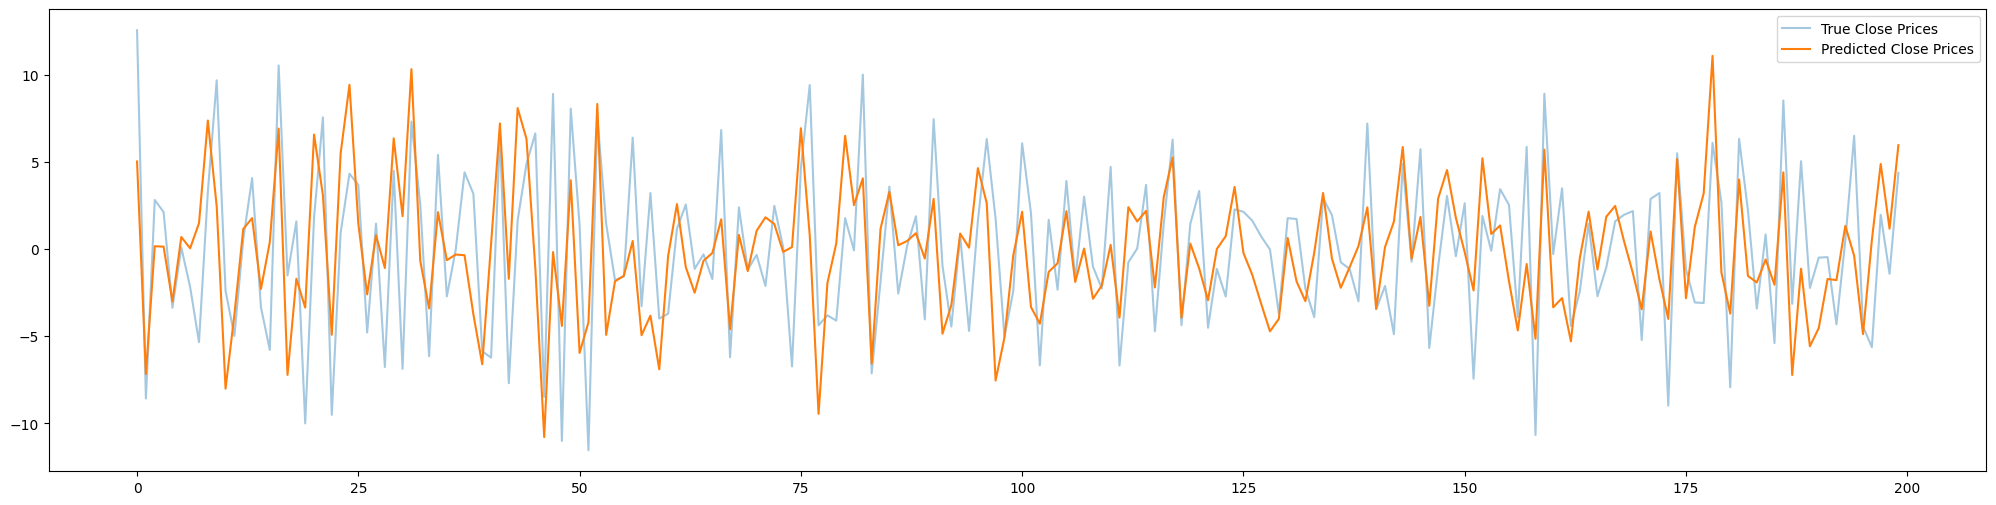

In [284]:
plt.figure(figsize=(25, 6))
plt.plot(y_true[:200], label='True Close Prices', alpha=0.4)
plt.plot(y_pred[:200], label='Predicted Close Prices')
plt.legend()

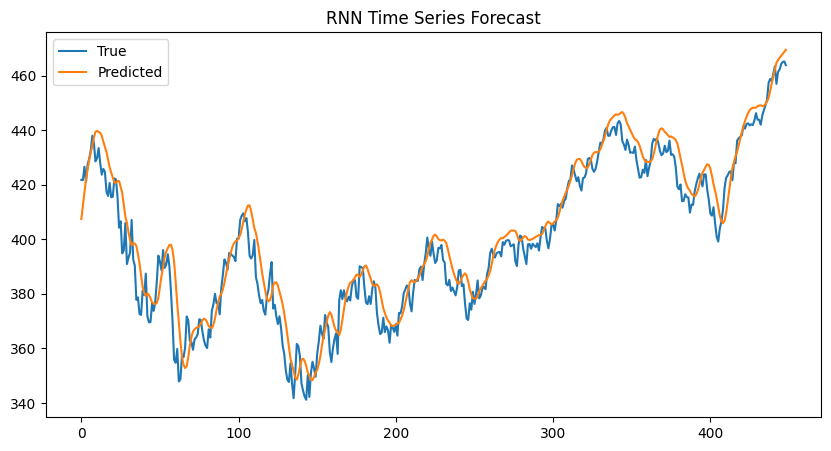

In [130]:
plt.figure(figsize=(10, 5))
plt.plot(y_true, label="True")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("RNN Time Series Forecast")
plt.show()
